In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, RepeatedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score

In [0]:
def get_dataset():
    X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=4, random_state=1)
    return X,y

###Data Loading And preparation

In [0]:
X,y = get_dataset()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Data Visualization

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(X)

In [18]:
x_df = pd.DataFrame(x)
x_df.head()

,0,1
0,-10.651712,-3.318849
1,-10.642656,2.836912
2,-0.907753,3.876096
3,-14.522515,2.660772
4,-8.107426,-6.021324


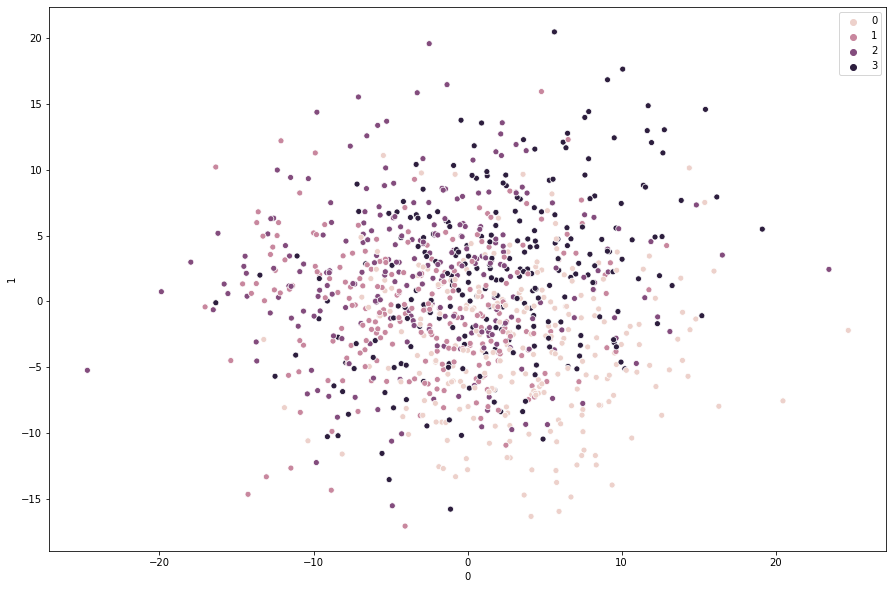

In [56]:
plt.figure(figsize=(15,10))
sns.scatterplot(x_df[0], x_df[1], hue=y)
plt.show()

###Logistic Regression as One Vs Rest Classifier
   Logistic Regression already has in-built one-vs-all classifier for multiclass classification

In [24]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
yhat = lr.predict(x_test)

####K-Fold Cross validation

In [40]:
cv = KFold(n_splits=10, random_state=2)
scoring = 'accuracy'

res = cross_val_score(lr, X, y, scoring=scoring, cv=cv)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [44]:
res.std()

0.04409081537009721

In [46]:
print("Accuracy: %.3f (%.3f)" % (res.mean(), res.std()))

Accuracy: 0.666 (0.044)


###Evaluatuion of Model using various error metrics
    1. f1-score
    2. confusion matrix
    3. precision score
    4. accuracy score

In [36]:
print("f1 score : ",f1_score(y_test, yhat, average='micro'))

score :  0.715


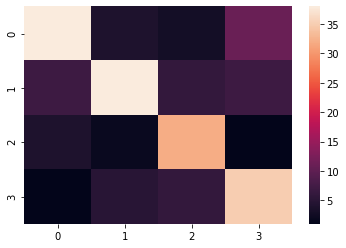

In [29]:
sns.heatmap(confusion_matrix(y_test,yhat))

In [37]:
print("precision : ",precision_score(y_test, yhat, average='micro'))

precision :  0.715


In [39]:
print("accuracy : ",accuracy_score(y_test, yhat))

accuracy :  0.715


###OneVsRestClassifier
   One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

   It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

   For example, given a multi-class classification problem with examples for each class ‘red,’ ‘blue,’ and ‘green‘. This could be divided into three binary classification datasets as follows:

    1. Binary Classification Problem 1: red vs [blue, green]
    2. Binary Classification Problem 2: blue vs [red, green]
    3. Binary Classification Problem 3: green vs [red, blue]

In [0]:
OvR = OneVsRestClassifier(lr)
OvR.fit(x_train, y_train)
y_pred_ovr = OvR.predict(x_test)

In [48]:
print("f1 score : ",f1_score(y_test, y_pred_ovr, average='micro'))

f1 score :  0.715


###SVC as One-vs-One Classifier
 SVC already has in-built one-vs-one classifier for multiclass classification

In [0]:
svc = SVC(decision_function_shape='ovr')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [50]:
print("f1 score : ",f1_score(y_test, svc_pred, average='micro'))

f1 score :  0.83


### OneVsOneClassifier
   One-vs-One (OvO for short) is another heuristic method for using binary classification algorithms for multi-class classification.

   Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

   For example, consider a multi-class classification problem with four classes: ‘red,’ ‘blue,’ and ‘green,’ ‘yellow.’ This could be divided into six binary classification datasets as follows:

  1. Binary Classification Problem 1: red vs. blue
  2. Binary Classification Problem 2: red vs. green
  3. Binary Classification Problem 3: red vs. yellow
  4. Binary Classification Problem 4: blue vs. green
  5. Binary Classification Problem 5: blue vs. yellow
  6. Binary Classification Problem 6: green vs. yellow

In [0]:
ovo = OneVsOneClassifier(lr)
ovo.fit(x_train, y_train)
ovo_pred = ovo.predict(x_test)

In [52]:
print("f1 score : ",f1_score(y_test, ovo_pred, average='micro'))

f1 score :  0.7299999999999999


In [0]:
model = SVC()
ovo_svc = OneVsOneClassifier(model)  #here model can be any classification model like decision tree, svc, lr, NN's, etc.
ovo_svc.fit(x_train, y_train)
ovo_svc_pred = ovo_svc.predict(x_test)

In [54]:
print("f1 score : ",f1_score(y_test, ovo_svc_pred, average='micro'))

f1 score :  0.83
